### Кредитный скоринг

**Описание признаков:**

• age – Возраст заёмщика кредитных средств; тип - integer  
• NumberOfTime30 - 59DaysPastDueNotWorse – количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней, но не больше в течение последних двух лет; тип - integer  
• DebtRatio – Ежемесячные отчисления на задолжености (кредиты,алименты и т.д.) / совокупный месячный доход percentage; тип - real  
• MonthlyIncome – Месячный доход в долларах; тип - real  
• NumberOfTimes90DaysLate – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип - integer  
• NumberOfTime60-89DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней, но не больше в течение последних двух лет; тип - integer  
• NumberOfDependents – Число человек в семье кредитозаёмщика; тип - integer  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_scoring = pd.read_csv('./cs_sample.csv', sep=";")
data_scoring.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [3]:
data_scoring.shape

(45063, 8)

In [5]:
data_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         36420 non-null  float64
 7   NumberOfDependents                    43946 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [6]:
data_scoring.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,3.642000e+04,43946.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.452263e+03,0.789628
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.263817e+04,1.130813
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,8.000000e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


Пропуски данных имеются в двух столбцах: месячном доходе и числе человек в семье. Можно бы было заменить пропуски на среднее или медианное значение по этому признаку, но, мне кажется, для данной задачи это не будет иметь смысла.

In [4]:
data_scoring_dropna = data_scoring.dropna()
data_scoring_dropna.shape

(36420, 8)

После удаления объектов с пропусками осталось около 80% от первоначальных данных

In [5]:
y = data_scoring_dropna['SeriousDlqin2yrs']
X = data_scoring_dropna.drop(columns = ['SeriousDlqin2yrs'])
y.shape, X.shape

((36420,), (36420, 7))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13, 
                                                    shuffle = True, stratify = y)

In [7]:
y.value_counts()

0    28063
1     8357
Name: SeriousDlqin2yrs, dtype: int64

Соотношение классов в таргете не сбалансировано (тех, кто выплатил кредит в 3,5 раза больше, чем неплательщиков). Метрику будем использовать Precision + Recall, причем в кредитном скоринге presicion будет иметь более важное значение (в задаче важно не столько обнаружение объектов одного класса, а скорее, точность определения класса)

In [30]:
y_train.value_counts()

0    21047
1     6268
Name: SeriousDlqin2yrs, dtype: int64

In [6]:
y_test.value_counts()

0    7016
1    2089
Name: SeriousDlqin2yrs, dtype: int64

При разбиении классы распределились одинаково для трейн и тест датасетов. Однако же, соотношение меток классов не сбалансировано. Решать проблему можно, например, добавив копии объектов недостающего класса или использованием наиболее подходящих метрик.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [9]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn_score = cross_validate(knn, X_train_sc, y_train, return_train_score=True, cv=5, scoring = ('precision', 'recall'))

In [11]:
print('Средние метрики на трейне:\n', 'Precision:', np.mean(knn_score['train_precision']),'\n', 'Recall:', np.mean(knn_score['train_recall']))

Средние метрики на трейне:
 Precision: 0.8076748194534161 
 Recall: 0.3437303009201355


In [12]:
print('Средние метрики на тесте:\n', 'Precision:', np.mean(knn_score['test_precision']),'\n', 'Recall:', np.mean(knn_score['test_recall']))

Средние метрики на тесте:
 Precision: 0.7270839159302876 
 Recall: 0.2940316764486126


Переобучение имеет место, т.к. метрики на трейне сильно лучше, чем на тесте

In [28]:
from sklearn.model_selection import learning_curve

lc = learning_curve(knn, X_train_sc, y_train, groups=None,train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring = 'precision')

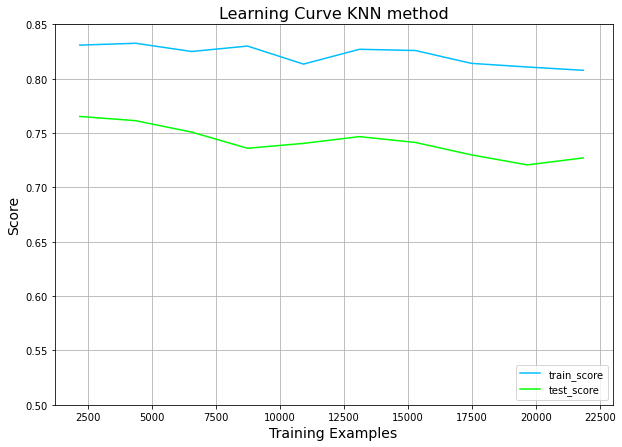

In [59]:
plt.figure(figsize=(10, 7))
plt.title("Learning Curve KNN method", fontsize=16)

plt.xlabel("Training Examples", fontsize=14)
plt.ylabel("Score", fontsize=14)

ax = plt.gca()
ax.set_xlim(1200, 23000)
ax.set_ylim(0.5, 0.85)

X_axis = lc[0]

train_mean = list()
test_mean = list()
for i in range(len(lc[1])):
    train_mean.append(np.mean(lc[1][i]))    
for i in range(len(lc[2])):
    test_mean.append(np.mean(lc[2][i]))
Y_axis = train_mean
Y2_axis = test_mean

ax.plot(X_axis, Y_axis,color='deepskyblue', label = 'train_score')

ax.plot(X_axis, Y2_axis, color = 'lime', label = 'test_score')
ax.grid()
plt.legend(loc="lower right")
plt.show()

In [9]:
knn_hyper = KNeighborsClassifier()
gridknn = {'n_neighbors': np.linspace(1,30,30, dtype=int), 'p':[1, 2]}
knn_grid = GridSearchCV(knn_hyper, gridknn, scoring=('precision'), cv = 5, return_train_score = True)
knn_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'p': [1, 2]},
             return_train_score=True, scoring='precision')

In [27]:
print('Best parameters', knn_grid.best_params_)
print('Best test presicion', knn_grid.best_score_)
print('Train presicion with n = 30, p = 1:', cv_results_knn.iloc[58]['mean_train_score'])

Best parameters {'n_neighbors': 30, 'p': 1}
Best test presicion 0.7904920674657757
Train presicion with n = 30, p = 1: 0.8268037501254721


In [31]:
knn_best = KNeighborsClassifier(n_neighbors = 30, p = 1)
knn_score = cross_validate(knn_best, X_train_sc, y_train, return_train_score=True, cv=5, scoring = ('precision', 'recall'))

In [29]:
print('Test recall:', np.mean(knn_score['test_recall']))
print('Train recall:', np.mean(knn_score['train_recall']))

Test recall: 0.19272393782831887
Train recall: 0.2118697994568349


Попробуем посмотреть метрику на нашем отложенном тесте

In [34]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
knn_best.fit(X_train_sc, y_train)
y_pred = knn_best.predict(X_test_sc)

In [38]:
precision_score(y_test, y_pred)

0.7563636363636363

In [40]:
recall_score(y_test, y_pred)

0.19913834370512207

После подбора гиперпараметров показатели presicion улучшились, степень переобучения также уменьшилась

Разделим трейн датасет на два класса, а затем сформируем 2 набора трейн датасетов: c Downsampling и Upsampling

In [264]:
X_train_scal = pd.DataFrame(X_train_sc, columns=list(X_train.columns.values), index=list(X_train.index))

In [265]:
y_train_ = pd.DataFrame(y_train, index=list(y_train.index))

In [266]:
X_train_scal['target'] = y_train_['SeriousDlqin2yrs']

In [267]:
data_train_majority = X_train_scal[X_train_scal.iloc[:, 7]==0]

In [268]:
data_train_minority = X_train_scal[X_train_scal.iloc[:, 7]==1]

In [269]:
from sklearn.utils import resample

data_train_majority_down = resample(data_train_majority, random_state=13, replace=False, n_samples = 6268)

In [270]:
data_train_minority_up = resample(data_train_minority, random_state=13, replace=True, n_samples = 21047)

In [271]:
data_train_down = pd.concat([data_train_majority_down, data_train_minority])
data_train_up = pd.concat([data_train_minority_up, data_train_majority])

In [272]:
y_train_down = data_train_down['target']
X_train_down = data_train_down.drop(columns = ['target'])

y_train_up = data_train_up['target']
X_train_up = data_train_up.drop(columns = ['target'])

In [273]:
y_train_down.value_counts(), y_train_up.value_counts()

(0    6268
 1    6268
 Name: target, dtype: int64,
 1    21047
 0    21047
 Name: target, dtype: int64)

Теперь в двух тестовых выборках у нас баланс классов, в одной мы убрали объекты преобладающего класса, в другой - увеличили число объектов недостающего класса.

### Downsampling

In [111]:
knn_down = KNeighborsClassifier(n_neighbors = 30, p = 1)
knn_score_down = cross_validate(knn_down, X_train_down, y_train_down, return_train_score=True, cv=5, scoring = ('precision', 'recall'))

In [115]:
print('Test precision:', np.mean(knn_score_down['test_precision']))
print('Train precision:', np.mean(knn_score_down['train_precision']))
print('Test recall:', np.mean(knn_score_down['test_recall']))
print('Train recall:', np.mean(knn_score_down['train_recall']))

Test precision: 0.8104888347622763
Train precision: 0.8349117220704331
Test recall: 0.46394312342562855
Train recall: 0.4900686214193478


На отложенном тесте

In [118]:
knn_down.fit(X_train_down, y_train_down)
y_pred = knn_down.predict(X_test_sc)
precision_score(y_test, y_pred),recall_score(y_test, y_pred)

(0.5513264129181085, 0.45763523216850166)

### Upsampling

In [119]:
knn_up = KNeighborsClassifier(n_neighbors = 30, p = 1)
knn_score_up = cross_validate(knn_up, X_train_up, y_train_up, return_train_score=True, cv=5, scoring = ('precision', 'recall'))

In [122]:
print('Test precision:', np.mean(knn_score_up['test_precision']))
print('Train precision:', np.mean(knn_score_up['train_precision']))
print('Test recall:', np.mean(knn_score_up['test_recall']))
print('Train recall:', np.mean(knn_score_up['train_recall']))

Test precision: 0.7913766830252273
Train precision: 0.8095350659249465
Test recall: 0.6237948429702442
Train recall: 0.6447948945974539


На отложенном тесте

In [123]:
knn_up.fit(X_train_up, y_train_up)
y_pred = knn_up.predict(X_test_sc)
precision_score(y_test, y_pred),recall_score(y_test, y_pred)

(0.47642679900744417, 0.5514600287218765)

Если судить по метрикам на кросс-валидации, то результаты улучшились: степень переобучения снизилась, recall значительно повысился.
На отложенном же тесте precision заметно снизился при повышении recall

In [232]:
from sklearn.tree import DecisionTreeClassifier
import typing as ty

class MyAwesomeTreesBaggingClassifier(object):
    def __init__(self, n_estimators, trees_hyperparams = {}):
        self.n_estimators = n_estimators
        self.trees_hyperparams = trees_hyperparams
        self.base_algorithms = []
        self.oob_error = []
    
    def fit(self, X, y):
        list_trees = []
        precision = []
        recall = []
        oob_error = []
        for i in range(self.n_estimators):
            X_bag, X_oob, y_bag, y_oob = train_test_split(X, y, train_size=0.63, 
                                                    shuffle = True)
            list_trees.append(DecisionTreeClassifier(criterion = trees_hyperparams.get('criterion'), 
                                                     max_depth = trees_hyperparams.get('max_depth'),
                                                    min_samples_leaf = trees_hyperparams.get('min_samples_leaf')))
            list_trees[-1].fit(X_bag,y_bag)
            y_pred = list_trees[-1].predict(X_oob)
            precision.append(precision_score(y_oob, y_pred))
            recall.append(recall_score(y_oob, y_pred))
            self.oob_error.append(1 - accuracy_score(y_oob,y_pred))
        print('Mean precision:', np.mean(precision),'\n', 'Mean recall:',  np.mean(recall))
        return self.oob_error
        
    
    def predict(self, X):
        pred_df = pd.DataFrame()
        for tree in list_trees:
            tree.fit
            pred_df.insert(0, 'predict', list(tree.predict(X)), allow_duplicates = True)
        mean_pred = pd.DataFrame(pred_df.mean(axis=1))
        total_pred = pd.DataFrame(mean_pred[0].round(0), dtype=int)
        return total_pred
        
    def get_oob_errors(self):
        return self.oob_error

In [233]:
bag_cl = MyAwesomeTreesBaggingClassifier(n_estimators=10, trees_hyperparams={'criterion': 'gini','max_depth':5, 'min_samples_leaf':2})
bag_cl.fit(X_train_sc, y_train)

Mean precision: 0.7074032650926922 
 Mean recall: 0.4404299210310859


[0.16651825467497772,
 0.17374097160383895,
 0.1748293262095577,
 0.17047590778668253,
 0.16355001484119913,
 0.16978331849213413,
 0.170871673097853,
 0.17759968338775112,
 0.1724547343425349,
 0.16958543583654895]

In [234]:
y_proba = bag_cl.predict(X_test_sc)

In [235]:
precision_score(y_test, y_proba),recall_score(y_test, y_proba)

(0.438770899231812, 0.46481570129248445)

In [237]:
bag_cl.get_oob_errors()
np.mean(bag_cl.get_oob_errors())

0.1709409320273078

На тренировочном датасете recall значительно выше, чем у метода knn.
Метрики на отложенных данных сравнимы с теми, что получились при балансировании классов, однако Precision значительно ниже, чем у KNN без балансировки.

In [240]:
tree = DecisionTreeClassifier(random_state = 13)
gridtree = {'max_depth': np.linspace(1,50,50, dtype=int), 'criterion':['gini', 'entropy'], 'min_samples_leaf': np.linspace(1,10,10, dtype=int)}
tree_grid = GridSearchCV(tree, gridtree, scoring=('precision', 'recall'), return_train_score = True,refit = 'precision')
tree_grid.fit(X_train_sc, y_train)

NameError: name 'dectree_grid' is not defined

In [241]:
print('Best parameters', tree_grid.best_params_)
print('Best score', tree_grid.best_score_)

Best parameters {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Best score 0.735742859373507


In [293]:
oob = []
for n_estimators in [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350]:
    bag = MyAwesomeTreesBaggingClassifier(n_estimators = n_estimators, trees_hyperparams={'criterion': 'gini','max_depth':1, 'min_samples_leaf':1})
    bag.fit(X_train_sc, y_train)
    oob.append(np.mean(bag.get_oob_errors()))

Mean precision: 0.7075328143412305 
 Mean recall: 0.4219018948547746
Mean precision: 0.7091626713854815 
 Mean recall: 0.44815279309170714
Mean precision: 0.7041285985605761 
 Mean recall: 0.45328157320638957
Mean precision: 0.7026820165248637 
 Mean recall: 0.44629234124005907
Mean precision: 0.7065771051607095 
 Mean recall: 0.44619477027898913
Mean precision: 0.7038855028563222 
 Mean recall: 0.4501156148617895
Mean precision: 0.7014082525651977 
 Mean recall: 0.4503148160941543
Mean precision: 0.7048317822607783 
 Mean recall: 0.44799252328164707
Mean precision: 0.7064249022663831 
 Mean recall: 0.4453087253592751
Mean precision: 0.7060315623218927 
 Mean recall: 0.4438659678187626
Mean precision: 0.7024296002841717 
 Mean recall: 0.4468879745798254


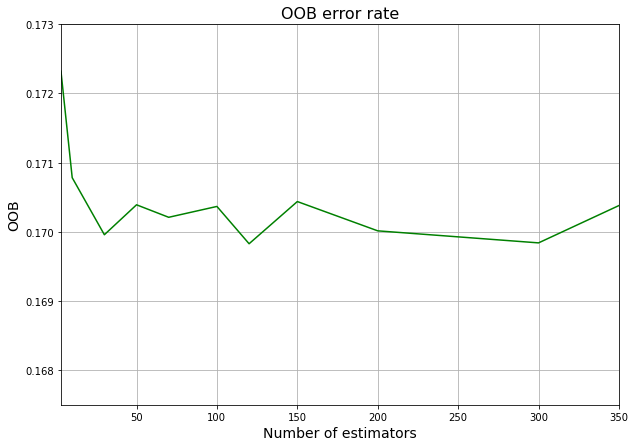

In [263]:
plt.figure(figsize=(10, 7))
plt.title("OOB error rate", fontsize=16)

plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("OOB", fontsize=14)
ax = plt.gca()
ax.set_xlim(3, 350)
ax.set_ylim(0.1675, 0.173)
X_axis = [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350]
Y_axis = oob
ax.plot(X_axis, Y_axis,color='green')
ax.grid()
plt.show()

In [274]:
from sklearn.ensemble import RandomForestClassifier

RandTree = RandomForestClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf=1)
gridrandtree = {'n_estimators':  [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350]}
randtree_grid = GridSearchCV(RandTree, gridrandtree, scoring=('precision', 'recall'), return_train_score = True,refit = 'precision')
randtree_grid.fit(X_train_sc, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

GridSearchCV(estimator=RandomForestClassifier(max_depth=1),
             param_grid={'n_estimators': [3, 10, 30, 50, 70, 100, 120, 150, 200,
                                          300, 350]},
             refit='precision', return_train_score=True,
             scoring=('precision', 'recall'))

In [275]:
print('Best parameters', randtree_grid.best_params_)
print('Best score', randtree_grid.best_score_)

Best parameters {'n_estimators': 200}
Best score 0.8519197388632872


Precision заметно вырос, причем склонности к переобучению нет, на тесте и трейне метрики примерно одинаковы, recall же низок, как и при бэггинге и Knn

На данных с апскейлингом класса:

In [287]:
RandTree1 = RandomForestClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf=1)
gridrandtree1 = {'n_estimators':  [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350]}
randtree_grid1 = GridSearchCV(RandTree1, gridrandtree1, scoring=('precision', 'recall'), return_train_score = True,refit = 'recall')
randtree_grid1.fit(X_train_up, y_train_up)

GridSearchCV(estimator=RandomForestClassifier(max_depth=1),
             param_grid={'n_estimators': [3, 10, 30, 50, 70, 100, 120, 150, 200,
                                          300, 350]},
             refit='recall', return_train_score=True,
             scoring=('precision', 'recall'))

In [288]:
print('Best parameters', randtree_grid1.best_params_)
print('Best score', randtree_grid1.best_score_)

Best parameters {'n_estimators': 350}
Best score 0.6654154512245843


In [292]:
pd.DataFrame(randtree_grid1.cv_results_['mean_test_precision'])

,0
0,0.805470
1,0.803854
2,0.808636
3,0.800491
4,0.801629
5,0.799471
6,0.794035
7,0.794383
8,0.795965
9,0.796738


С применением балансировки классов результат гораздо лучше, precision = 0.8, recall = 0.67

In [305]:
oob = []
for n_estimators in [25, 30, 50, 70, 100, 120, 150, 200, 300, 350]:
    randtree = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini', max_depth = 1, min_samples_leaf=1, oob_score = True)
    randtree.fit(X_train_sc, y_train)
    oob.append(1 - randtree.oob_score_)

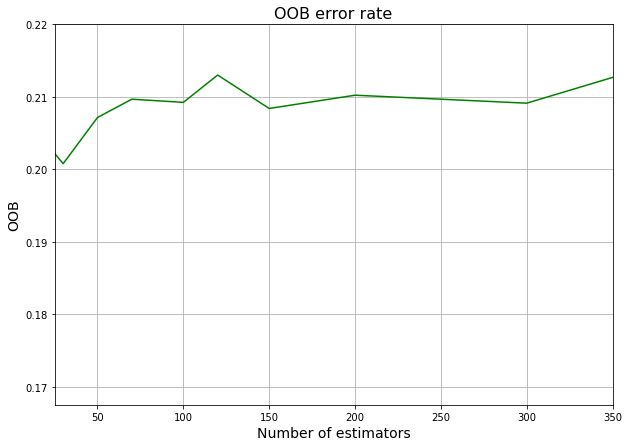

In [307]:
plt.figure(figsize=(10, 7))
plt.title("OOB error rate", fontsize=16)

plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("OOB", fontsize=14)
ax = plt.gca()
ax.set_xlim(25, 350)
ax.set_ylim(0.1675, 0.22)
X_axis = [25, 30, 50, 70, 100, 120, 150, 200, 300, 350]
Y_axis = oob
ax.plot(X_axis, Y_axis,color='green')
ax.grid()
plt.show()

![ex2](https://scikit-learn.org/stable/_images/sphx_glr_plot_forest_importances_001.png)

In [312]:
RandTree = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 1, min_samples_leaf=1)
RandTree.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=1, n_estimators=200)

In [320]:
features=list(X_train.columns)

In [322]:
importances = RandTree.feature_importances_
std = np.std([RandTree.feature_importances_ for tree in RandTree.estimators_], axis=0)

Text(0, 0.5, 'Mean decrease in impurity')

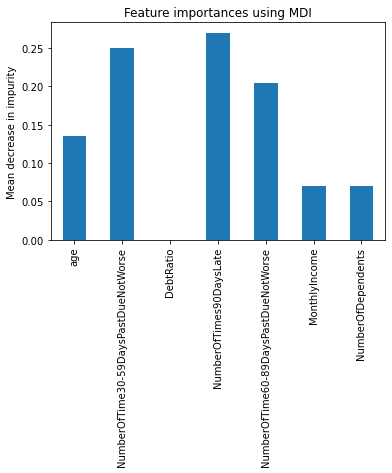

In [331]:
forest_importances = pd.Series(importances, index=features)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Наибольшие веса имеют три признака: количество раз, когда у человека была просрочка других кредитов(на 30-59 дней, 60-89 дней и свыше 90 дней). Также сильный вклад вносит возраст. А отношение задолженности к сумамрному доходу вообще не влияет на результат.

In [332]:
RandTree = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 1, min_samples_leaf=1, oob_score = True)
RandTree.fit(X_train_sc, y_train)
y_pred = RandTree.predict(X_test_sc)

In [335]:
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))
print('OOB-error:'), RandTree.oob_score_

Precision на тесте: 0.8158844765342961
Recall на тесте: 0.10818573480134036
OOB-error:


(None, 0.7915431081823174)

In [337]:
RandTree_bal = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 1, min_samples_leaf=1, oob_score = True,class_weight = 'balanced')
RandTree_bal.fit(X_train_sc, y_train)
y_pred = RandTree_bal.predict(X_test_sc)

In [338]:
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))
print('OOB-error:'), RandTree_bal.oob_score_

Precision на тесте: 0.5167315175097277
Recall на тесте: 0.6357108664432743
OOB-error:


(None, 0.7909939593629873)

Precision при балансировке весов снизился, recall увеличился. Если считать f1-score, то он намного выше при балансировке.

In [339]:
from sklearn.ensemble import GradientBoostingClassifier

gradboo = GradientBoostingClassifier(n_estimators=200,max_depth=1)
gradboo.fit(X_train_sc, y_train)
y_pred = gradboo.predict(X_test_sc)
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))

Precision на тесте: 0.7328833172613307
Recall на тесте: 0.3638104356151269


In [350]:
error = []
for n_estimators in [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350, 500, 750]:
    gradboo = GradientBoostingClassifier(n_estimators = n_estimators, max_depth = 1, min_samples_leaf=1)
    gradboo.fit(X_train_sc, y_train)
    error.append(1 - gradboo.score(X_train_sc, y_train))

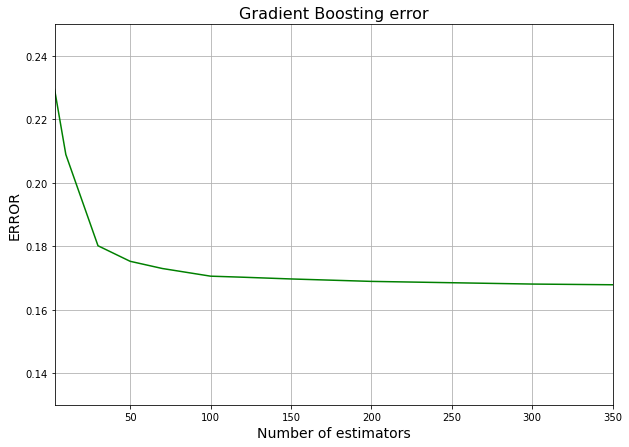

In [353]:
plt.figure(figsize=(10, 7))
plt.title("Gradient Boosting error", fontsize=16)

plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("ERROR", fontsize=14)
ax = plt.gca()
ax.set_xlim(3, 350)
ax.set_ylim(0.13, 0.25)
X_axis = [3, 10, 30, 50, 70, 100, 120, 150, 200, 300, 350, 500, 750]
Y_axis = error
ax.plot(X_axis, Y_axis,color='green')
ax.grid()
plt.show()

In [407]:
gradboo_best = GradientBoostingClassifier(n_estimators=50,max_depth=3, min_samples_leaf = 1, 
                                          loss = 'exponential', learning_rate = 0.7)
gradboo_best.fit(X_train_sc, y_train)
y_pred = gradboo_best.predict(X_test_sc)
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))

Precision на тесте: 0.6919117647058823
Recall на тесте: 0.4504547630445189


При заданных выше гиперпараметрах на тесте чуть хуже Precision, зато выше recall.
Градиентный бустинг более склонен к переобучению, чем bagging или random forest.

In [415]:
bag = MyAwesomeTreesBaggingClassifier(n_estimators = 200, trees_hyperparams={'criterion': 'gini','max_depth':1, 'min_samples_leaf':1})
bag.fit(X_train_sc, y_train)
y_pred = bag.predict(X_test_sc)
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))

Mean precision: 0.7047005985360567 
 Mean recall: 0.4429204678500874
Precision на тесте: 0.438770899231812
Recall на тесте: 0.46481570129248445


In [409]:
RandTree = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 1, min_samples_leaf=1)
RandTree.fit(X_train_sc, y_train)
y_pred = RandTree.predict(X_test_sc)
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))

Precision на тесте: 0.8158844765342961
Recall на тесте: 0.10818573480134036


In [408]:
gradboo_best = GradientBoostingClassifier(n_estimators=50,max_depth=3, min_samples_leaf = 1, 
                                          loss = 'exponential', learning_rate = 0.7)
gradboo_best.fit(X_train_sc, y_train)
y_pred = gradboo_best.predict(X_test_sc)
print('Precision на тесте:', precision_score(y_test, y_pred))
print('Recall на тесте:', recall_score(y_test, y_pred))

Precision на тесте: 0.6924208977189109
Recall на тесте: 0.4504547630445189


В нашем случае gradient boosting и бэггинг более всего склонны к переобучению.